In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams.update({'font.size': 22})

In [2]:
df= pd.read_csv('raw_data.csv', index_col = ['moment'], parse_dates = ['moment'])
df.head()

,SM_Exgauster\[0:0],SM_Exgauster\[0:1],SM_Exgauster\[0:2],SM_Exgauster\[0:3],SM_Exgauster\[0:4],SM_Exgauster\[0:5],SM_Exgauster\[0:6],SM_Exgauster\[0:7],SM_Exgauster\[0:8],SM_Exgauster\[0:9],...,SM_Exgauster\[6:2],SM_Exgauster\[6.0],SM_Exgauster\[7:0],SM_Exgauster\[7:1],SM_Exgauster\[7:2],SM_Exgauster\[7.0],SM_Exgauster\[8:0],SM_Exgauster\[8:1],SM_Exgauster\[8:2],SM_Exgauster\[8.0]
moment,,,,,,,,,,,,,,,,,,,,,
2023-01-25 06:32:25.125007,1.284722,1.689815,0.964621,1.614583,2.089120,1.440972,2.001208,1.539352,1.494385,1.765046,...,2.600589,1.0,625.000000,138.372635,3.098138,1.0,0.723379,15.567306,-5.605194e-45,0.0
2023-01-25 06:33:25.125007,1.267361,1.689815,0.962173,1.626158,2.065972,1.417824,1.997886,1.556713,1.482208,1.741898,...,2.594604,1.0,617.404541,138.209290,3.100688,1.0,0.723379,15.139420,-5.605194e-45,0.0
2023-01-25 06:34:25.125007,1.296296,1.701389,0.971429,1.620370,2.083333,1.429398,1.990758,1.527778,1.489869,1.712963,...,2.591550,1.0,618.438721,138.295776,3.107095,1.0,0.723379,15.138195,-5.605194e-45,0.0
2023-01-25 06:35:25.125007,1.255787,1.689815,0.971007,1.614583,2.077546,1.429398,2.019292,1.516204,1.489961,1.712963,...,2.686367,1.0,622.107178,138.080093,3.112228,1.0,0.723379,15.138195,-5.605194e-45,0.0
2023-01-25 06:36:25.125007,1.302083,1.701389,0.966538,1.620370,2.112268,1.452546,1.981981,1.562500,1.494923,1.770833,...,2.692058,1.0,617.766602,138.354065,3.106137,1.0,0.723379,15.138195,-5.605194e-45,0.0


In [62]:
column_name = 'SM_Exgauster\[0:10]'

In [32]:
df['SM_Exgauster\[0:0]']

moment
2023-01-25 06:32:25.125007    1.284722
2023-01-25 06:33:25.125007    1.267361
2023-01-25 06:34:25.125007    1.296296
2023-01-25 06:35:25.125007    1.255787
2023-01-25 06:36:25.125007    1.302083
                                ...   
2023-02-16 23:56:25.498636    1.423611
2023-02-16 23:57:25.498636    1.452546
2023-02-16 23:58:25.498636    1.440972
2023-02-16 23:59:25.498636    1.446759
2023-02-17 00:00:25.498636    1.452546
Name: SM_Exgauster\[0:0], Length: 30993, dtype: float64

In [13]:
col_name = ['SM_Exgauster\[0:10]']

In [54]:
df_for_plot = df[df.index <'02.02.2023']

<Axes: xlabel='moment'>

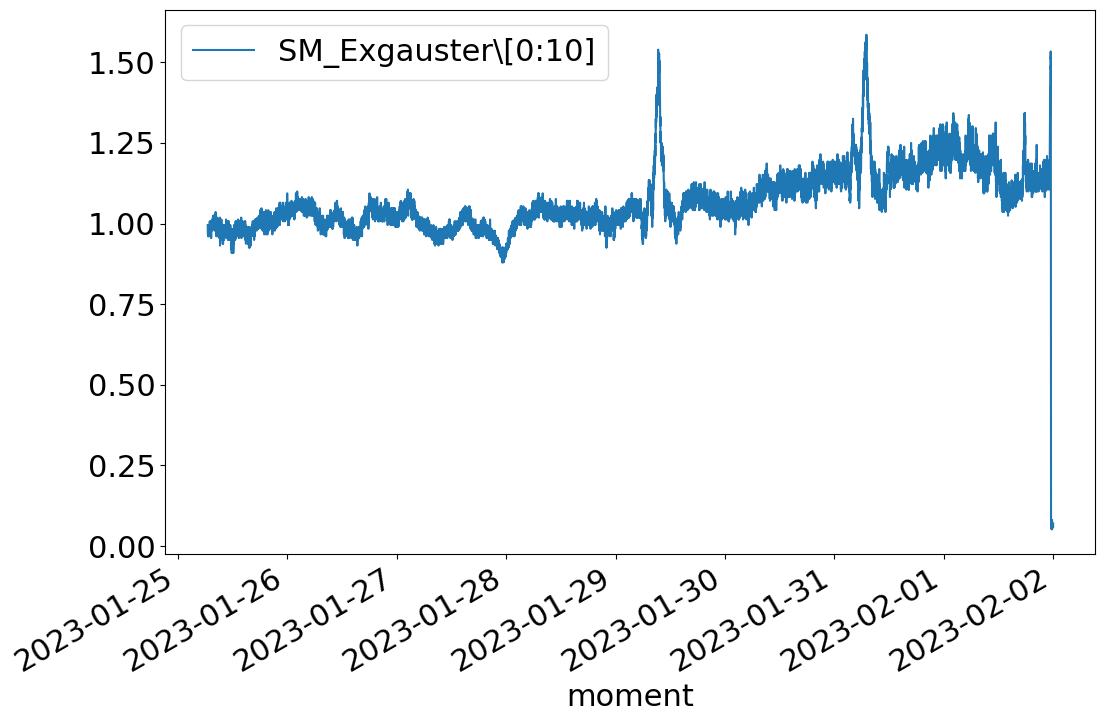

In [55]:
df_for_plot[col_name].plot()
# df['SM_Exgauster\[0.0]'].plot()

In [4]:
def get_amplitude(y):
    """
    расчет амплитуды
    
    """
    
    np_fft = np.fft.fft(y)
    n_samples = len(np_fft)
    amplitudes = 2 / n_samples * np.abs(np_fft) 
    return max(amplitudes)

Расчет амлитуды и дисперсии

In [78]:
def create_features(df, col_name, col_output_name=['amplitude']):
    result = []
    calc_std = []
    v = []
    for i in df[col_name].index:
        v.append(df.loc[i, col_name].values)
        if len(v) >= 10:
#         print(v, '\n')
            result.append(get_amplitude(v))
#             calc_std.append(np.std(v))
            v = []
            
    return pd.DataFrame(result, columns=col_output_name)

In [79]:
# df_from7 = create_features(df, [....])
df_from8 = create_features(df, [column_name])
df_from7 = create_features(df, [column_name], ['ampl7'])

In [80]:
pd.concat([df_from8, df_from7],)

,amplitude,ampl7
0,0.199074,NaN
1,0.197917,NaN
2,0.201389,NaN
3,0.199074,NaN
4,0.201389,NaN
...,...,...
3094,NaN,0.469907
3095,NaN,0.459491
3096,NaN,0.452546
3097,NaN,0.450232


In [59]:
# amplitude = result[0:1150]
# std_for_print = calc_std[0:1150]

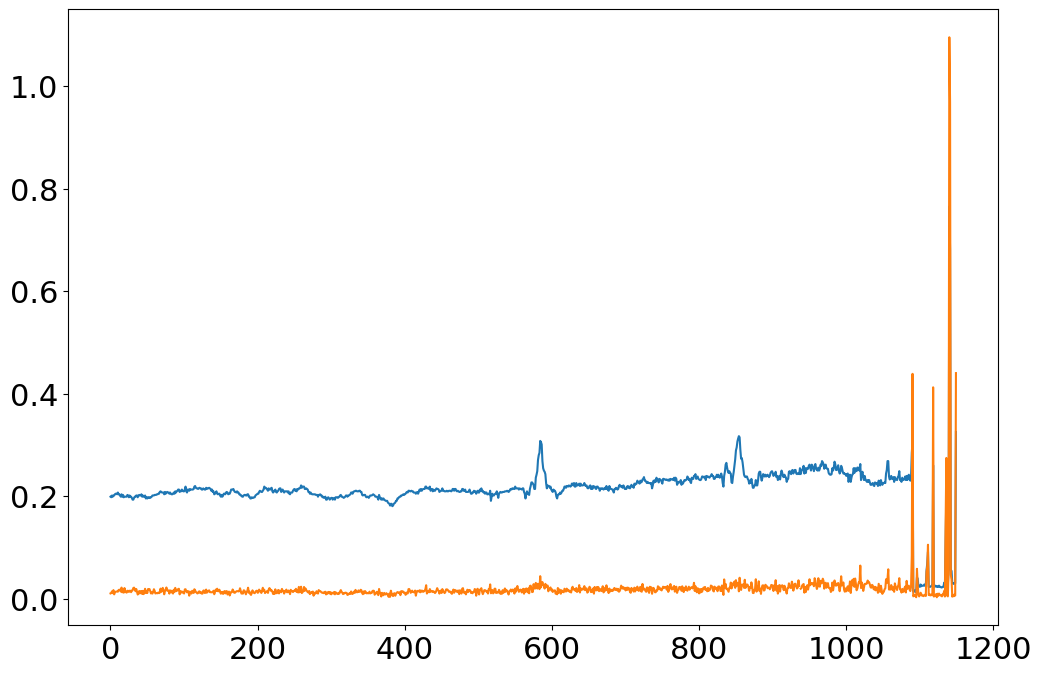

In [61]:
plt.plot(amplitude)
plt.plot(std_for_print)

In [24]:
df_input_model = pd.DataFrame(result, columns=['feature'])

In [26]:
df_input = df_input_model[0:1000]

In [27]:
def get_linear_approx(x, y):
    model = LinearRegression()
    model.fit(x, y)
    
    return model.coef_, model.predict(x)

In [29]:
coeff, x_predict =  get_linear_approx(np.array(df_input.index).reshape(-1, 1), df_input.values)

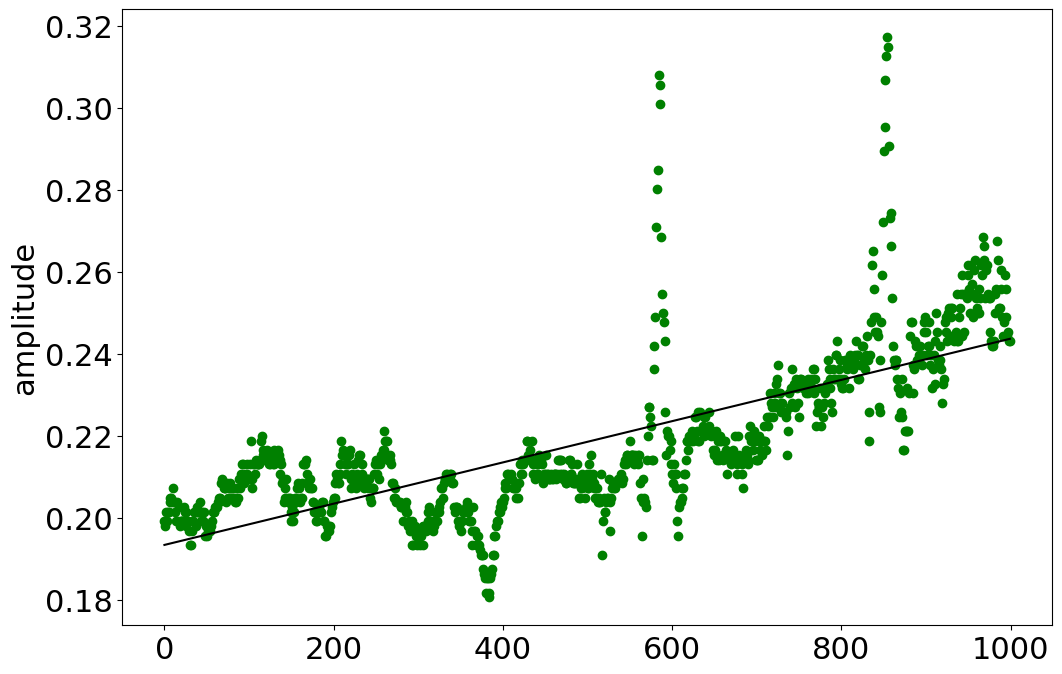

In [30]:
plt.scatter(df_input.index, df_input.values,color='g')
plt.plot(np.array(df_input.index).reshape(-1, 1), x_predict, color='k')

plt.ylabel('amplitude')
plt.show()